# Testing algorithms on synthetic data

## Generating Synthetic data

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import make_regression
X_reg, y_reg = make_regression(n_samples=2000, n_features=10, noise=1, random_state=42)

In [3]:
X_reg.shape

(2000, 10)

In [4]:
y_reg.shape

(2000,)

In [5]:
from sklearn.model_selection import train_test_split
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [6]:
X_trainR[:5]

array([[-1.25615527e+00,  2.11842102e-03, -1.56410176e+00,
         2.24816737e-01, -1.62956311e-01, -2.62668476e+00,
         6.31836688e-02, -2.14694547e-01, -4.45448642e-02,
         2.41914984e-01],
       [ 9.04962041e-01, -1.71767215e+00, -8.25925754e-02,
         7.69968731e-01, -7.03916325e-01,  1.43642952e+00,
        -1.05470445e+00,  2.36142410e-01, -2.25806749e-01,
        -6.72303072e-02],
       [-8.64896112e-01,  9.34584918e-02,  1.98337360e+00,
         2.31528480e-01,  8.32092018e-01, -1.18585233e+00,
         8.20607476e-01,  3.92044504e-01,  1.27524701e+00,
        -9.74167428e-01],
       [ 3.67360349e-01, -1.15612737e+00, -3.11208289e-01,
        -1.09104672e+00,  7.00972323e-01, -3.52593097e-01,
         1.07334018e+00, -1.10876490e+00,  1.60284425e+00,
         8.14684437e-01],
       [ 6.56898706e-01, -7.05537947e-01, -1.26296294e+00,
        -1.91115933e+00,  1.23754643e-01,  5.99097741e-02,
         3.12062132e-01, -8.46039673e-01, -7.22347405e-01,
         8.

In [7]:
y_trainR[:5]

array([-346.19795702,  163.11771399,   16.76221407,   74.71515627,
       -118.61177547])

In [8]:
from sklearn.datasets import make_classification
X_clf, y_clf = make_classification(n_samples=2000, n_features=10, n_redundant=0, n_informative=5, n_classes=3, class_sep=0.3, random_state=42)

In [9]:
X_clf.shape

(2000, 10)

In [10]:
y_clf.shape

(2000,)

In [11]:
X_trainC, X_testC, y_trainC, y_testC = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

In [12]:
X_trainC[:5]

array([[-1.43037644, -0.42589154, -0.71121683,  0.53972751,  2.0658328 ,
         0.5640911 , -1.01928412,  1.93187661,  2.43573186,  2.17243862],
       [ 0.41712027,  0.86935574,  0.20083974,  0.33961288, -0.52676716,
         0.01540468,  1.32795948, -0.5073455 , -0.3554143 , -0.77310046],
       [-0.10172463, -2.97158253, -0.79972226,  0.58034668, -0.59232719,
        -0.34556712,  0.44523236, -0.4915638 ,  1.32973079,  0.06942513],
       [-2.04739351,  0.3493413 ,  0.96048441,  0.38523535, -1.06153698,
         1.20064195, -0.8553334 ,  0.2456215 , -0.75640399,  0.56193069],
       [ 0.64522142,  0.98615441, -1.86756394,  1.34211957,  1.47309558,
         0.66968449,  1.83114708,  1.79082671,  1.98521282,  0.82850308]])

In [13]:
y_trainC[:5]

array([2, 1, 1, 2, 0])

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaledtrainC = scaler.fit_transform(X_trainC)
X_scaledtestC = scaler.fit_transform(X_testC)

X_scaledtrainR = scaler.fit_transform(X_trainR)
X_scaledtestR = scaler.fit_transform(X_testR)

## KNN

In [15]:
from KNN import *

In [16]:
from sklearn.neighbors import KNeighborsClassifier # Comparing results with sci-kit learn implementation

In [17]:
from sklearn.neighbors import KNeighborsRegressor # Comparing results with sci-kit learn implementation

### KNN Classifier

In [37]:
NN_clf = KNN_clf(n_neighbours=1)

In [38]:
NN_clf.fit(X_trainC,y_trainC)

In [39]:
preds_clf = NN_clf.predict(X_testC)

In [40]:
preds_clf[:10]

[0, 2, 0, 0, 1, 1, 0, 0, 2, 2]

In [41]:
y_testC[:10]

array([0, 2, 1, 0, 0, 1, 2, 0, 2, 2])

In [42]:
acc = NN_clf.accuracy_metric(preds_clf, y_testC)

In [43]:
print('Model Accuracy: ', acc *100,'%' )

Model Accuracy:  56.75 %


In [44]:
# Scaled data
NN_clf.fit(X_scaledtrainC, y_trainC)
preds_clf = NN_clf.predict(X_scaledtestC)
acc = NN_clf.accuracy_metric(preds_clf, y_testC)
print('Model Accuracy: ', acc *100,'%' )

Model Accuracy:  53.75 %


In [45]:
# Scikit learn implementation
one_nn = KNeighborsClassifier(n_neighbors=1)
one_nn.fit(X_trainC, y_trainC)
acc = one_nn.score(X_testC, y_testC)
print('Scikit KNN Accuracy: ', acc *100,'%' )

Scikit KNN Accuracy:  56.75 %


In [46]:
# Scaled data
one_nn.fit(X_scaledtrainC, y_trainC)
acc = one_nn.score(X_scaledtestC, y_testC)
print('Scikit KNN Accuracy: ', acc *100,'%' )

Scikit KNN Accuracy:  53.75 %


### Using n_neighbours > 1 on KNN Classifier

In [50]:
for i in range(2,6):
    knn = KNN_clf(n_neighbours=i)
    knn.fit(X_trainC,y_trainC)
    preds = knn.predict(X_testC)
    print(f'(KNN={i}) Model Accuracy:  {knn.accuracy_metric(preds, y_testC)*100}%' )

(KNN=2) Model Accuracy:  56.75%
(KNN=3) Model Accuracy:  58.75%
(KNN=4) Model Accuracy:  61.25000000000001%
(KNN=5) Model Accuracy:  57.75%


In [52]:
#scaled data on model
for i in range(2,6):
    knn = KNN_clf(n_neighbours=i)
    knn.fit(X_scaledtrainC,y_trainC)
    preds = knn.predict(X_scaledtestC)
    print(f'(KNN={i}) Model Accuracy:  {knn.accuracy_metric(preds, y_testC)*100}%' )

(KNN=2) Model Accuracy:  53.75%
(KNN=3) Model Accuracy:  56.25%
(KNN=4) Model Accuracy:  57.49999999999999%
(KNN=5) Model Accuracy:  57.75%


In [48]:
#scikit-learn
for i in range(2,6):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainC, y_trainC)
    print(f'(KNN={i})Scikit KNN Accuracy: {knn.score(X_testC, y_testC) *100}%' )

(KNN=2)Scikit KNN Accuracy: 54.25%
(KNN=3)Scikit KNN Accuracy: 59.0%
(KNN=4)Scikit KNN Accuracy: 59.0%
(KNN=5)Scikit KNN Accuracy: 57.75%


In [53]:
#scaled data on scikit-learn
for i in range(2,6):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_scaledtrainC, y_trainC)
    print(f'(KNN={i})Scikit KNN Accuracy: {knn.score(X_scaledtestC, y_testC) *100}%' )

(KNN=2)Scikit KNN Accuracy: 51.24999999999999%
(KNN=3)Scikit KNN Accuracy: 57.49999999999999%
(KNN=4)Scikit KNN Accuracy: 56.49999999999999%
(KNN=5)Scikit KNN Accuracy: 57.25%


### KNN Regressor

In [55]:
NN_reg = KNN_reg(n_neighbours=1)

In [56]:
NN_reg.fit(X_trainR,y_trainR)

In [57]:
preds = NN_reg.predict(X_testR)

In [58]:
preds[:10]

[193.6982788402849,
 -350.99647703704517,
 215.21096363471594,
 -12.77135792784944,
 104.01421193460759,
 -261.06222596967706,
 -260.6295121294614,
 13.431203983799127,
 -61.56627820438884,
 156.88735500446546]

In [59]:
y_testR[:10]

array([ 455.13894806, -140.47350903,  245.50507642,  117.71242486,
        116.77309803, -254.1650535 , -389.266354  ,   61.82059561,
         67.65812716,   71.71857551])

In [60]:
mse = NN_reg.MSE_metric(preds, y_testR)

In [61]:
print('Model MSE: ', mse)

Model MSE:  12501.314772337051


In [62]:
r2 = NN_reg.r2_metric(preds, y_testR)

In [63]:
print('Model R^2:', r2)

Model R^2: 0.6506934027605624


In [21]:
from sklearn.metrics import mean_squared_error as MSE

In [70]:
# Scikit learn implementation
one_nn = KNeighborsRegressor(n_neighbors=1)
one_nn.fit(X_trainR, y_trainR)
r2 = one_nn.score(X_testR, y_testR)
print('Scikit KNN R^2:', r2)
print('Scikit MSE:', MSE(y_testR, one_nn.predict(X_testR)))

Scikit KNN R^2: 0.6506934027605624
Scikit MSE: 12501.314772337051


In [65]:
#scaled data on model
NN_reg.fit(X_scaledtrainR,y_trainR)
preds = NN_reg.predict(X_scaledtestR)
mse = NN_reg.MSE_metric(preds, y_testR)
r2 = NN_reg.r2_metric(preds, y_testR)
print(f'Model MSE: {mse}, Model R^2: {r2}')

Model MSE: 12182.989137707047, Model R^2: 0.6595879267583695


In [71]:
# scaled data on scikit implementation
one_nn.fit(X_scaledtrainR, y_trainR)
r2 = one_nn.score(X_scaledtestR, y_testR)
print('Scikit KNN R^2:', r2)
print('Scikit MSE:', MSE(y_testR, one_nn.predict(X_scaledtestR)))

Scikit KNN R^2: 0.6595879267583695
Scikit MSE: 12182.98913770704


### Using n_neighbours > 1 on KNN Regressor

In [67]:
for i in range(2,6):
    knn = KNN_reg(n_neighbours=i)
    knn.fit(X_trainR,y_trainR)
    preds = knn.predict(X_testR)
    print(f'(KNN={i}) Model MSE: {knn.MSE_metric(preds, y_testR)}, Model R^2: {knn.r2_metric(preds, y_testR)}')

(KNN=2) Model MSE: 8091.990048692295, Model R^2: 0.7738969412194328
(KNN=3) Model MSE: 6824.433578197607, Model R^2: 0.8093144829404912
(KNN=4) Model MSE: 6570.6793521903855, Model R^2: 0.8164047791881985
(KNN=5) Model MSE: 5993.00613007961, Model R^2: 0.8325458868402007


In [68]:
# Testing on scaled data
print("---SCALED DATA---")
for i in range(2,6):
    knn = KNN_reg(n_neighbours=i)
    knn.fit(X_scaledtrainR,y_trainR)
    preds = knn.predict(X_scaledtestR)
    print(f'(KNN={i}) Model MSE: {knn.MSE_metric(preds, y_testR)}, Model R^2: {knn.r2_metric(preds, y_testR)}')

---SCALED DATA---
(KNN=2) Model MSE: 8009.513526851514, Model R^2: 0.7762014662810764
(KNN=3) Model MSE: 6789.276816690912, Model R^2: 0.8102968187152081
(KNN=4) Model MSE: 6215.515606700963, Model R^2: 0.8263286185330208
(KNN=5) Model MSE: 5748.808852904878, Model R^2: 0.8393691467531335


In [72]:
#scikit implementation
for i in range(2,6):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_trainR,y_trainR)
    print(f'(KNN={i}) Scikit MSE: {MSE(y_testR, knn.predict(X_testR))}, Scikit R^2: {knn.score(X_testR, y_testR)}')

(KNN=2) Scikit MSE: 8091.9900486923, Scikit R^2: 0.7738969412194328
(KNN=3) Scikit MSE: 6824.433578197607, Scikit R^2: 0.8093144829404912
(KNN=4) Scikit MSE: 6570.67935219039, Scikit R^2: 0.8164047791881985
(KNN=5) Scikit MSE: 5993.006130079613, Scikit R^2: 0.8325458868402007


In [73]:
# scikit implementation on scaled data
print('---Scaled---')
for i in range(2,6):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_scaledtrainR,y_trainR)
    print(f'(KNN={i}) Scikit MSE: {MSE(y_testR, knn.predict(X_scaledtestR))}, Scikit R^2: {knn.score(X_scaledtestR, y_testR)}')

---Scaled---
(KNN=2) Scikit MSE: 8009.513526851519, Scikit R^2: 0.7762014662810764
(KNN=3) Scikit MSE: 6789.276816690911, Scikit R^2: 0.8102968187152081
(KNN=4) Scikit MSE: 6215.515606700961, Scikit R^2: 0.8263286185330208
(KNN=5) Scikit MSE: 5748.808852904879, Scikit R^2: 0.8393691467531335


## Linear Regression

In [15]:
from LinearRegression import LinearRegression

In [16]:
lr_model = LinearRegression()

In [17]:
lr_model.fit(X_trainR, y_trainR)

In [18]:
lr_model.xm.shape

(11, 1600)

In [19]:
lr_model.ym.shape

(1600,)

In [20]:
pred_Train, pred_Test, MSEtrain, MSEtest = lr_model.predict(X_testR, y_testR)

MSEtrain:  1.0031967671398174
MSEtest:  0.9534213201938556


In [23]:
# Checking MSE is working correctly
print('MSE Train (scikit metric):',MSE(y_trainR,pred_Train))
print('MSE Test (scikit metric):',MSE(y_testR,pred_Test))

MSE Train (scikit metric): 1.003196767139817
MSE Test (scikit metric): 0.9534213201938564


In [24]:
from sklearn.metrics import r2_score

In [25]:
print('Train R^2:', r2_score(y_trainR, pred_Train))
print('Test R^2:', r2_score(y_testR, pred_Test))

Train R^2: 0.9999750198005156
Test R^2: 0.9999733598934866


In [26]:
print('---SCALED DATA---')
lr_model_scaled = LinearRegression()
lr_model_scaled.fit(X_scaledtrainR, y_trainR)
pred_Train, pred_Test, MSEtrain, MSEtest = lr_model_scaled.predict(X_scaledtestR, y_testR)
print('Train (scaled) R^2:', r2_score(y_trainR, pred_Train))
print('Test (scaled) R^2:', r2_score(y_testR, pred_Test))

---SCALED DATA---
MSEtrain:  1.003196767139817
MSEtest:  38.881306447723425
Train (scaled) R^2: 0.9999750198005156
Test (scaled) R^2: 0.9989135945219513


In [27]:
# Checking MSE is working correctly
print('MSE Train (scikit metric):',MSE(y_trainR,pred_Train))
print('MSE Test (scikit metric):',MSE(y_testR,pred_Test))

MSE Train (scikit metric): 1.0031967671398179
MSE Test (scikit metric): 38.88130644772342


In [28]:
# scikit learn implementation
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression().fit(X_trainR, y_trainR)
print("Training score:",reg.score(X_trainR, y_trainR))
print("Test score:",reg.score(X_testR, y_testR))

Training score: 0.9999750198005156
Test score: 0.9999733598934866


In [30]:
print('Train MSE:', MSE(y_trainR, reg.predict(X_trainR)))
print('Test MSE:', MSE(y_testR, reg.predict(X_testR)))

Train MSE: 1.0031967671398165
Test MSE: 0.95342132019384


## Decision Trees

In [14]:
from DecisionTree import *

### Decision Tree Classifier

In [23]:
dtc = DecisionTreeClassifier(max_depth=3, min_size=10)

In [24]:
train_data = np.concatenate((X_trainC,y_trainC[:,None]),axis=1).tolist()

In [25]:
dtc.fit(train_data, print_tree = True)

[X2 < -1.682]
 [X1 < 0.940]
  [X8 < -0.121]
   [1.0]
   [1.0]
  [X4 < 1.694]
   [2.0]
   [0.0]
 [X1 < 0.036]
  [X8 < 0.274]
   [0.0]
   [2.0]
  [X1 < 0.956]
   [1.0]
   [2.0]


In [26]:
cv_scores = dtc.evaluate(n_folds=5)

In [27]:
print("Cross Validation scores:",cv_scores)

Cross Validation scores: [0.534375, 0.484375, 0.5125, 0.528125, 0.496875]


In [28]:
predictions = dtc.decision_tree(X_testC)

In [29]:
print(f"DTC Accuracy: {dtc.accuracy_metric(y_testC, predictions)*100}%")

DTC Accuracy: 48.25%


In [30]:
from sklearn import tree

In [31]:
#scikit-learn implementation
clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_split=10)
clf = clf.fit(X_trainC, y_trainC)
preds = clf.predict(X_testC)

In [32]:
print(f'Scikit Decision Tree: {sum(preds[i] == y_testC[i] for i in range(len(preds)))/len(preds)*100}%')

Scikit Decision Tree: 48.5%


[Text(0.5, 0.875, 'x[1] <= -1.682\ngini = 0.667\nsamples = 1600\nvalue = [546, 528, 526]'),
 Text(0.25, 0.625, 'x[0] <= 0.912\ngini = 0.465\nsamples = 149\nvalue = [27, 104, 18]'),
 Text(0.125, 0.375, 'x[7] <= -0.127\ngini = 0.321\nsamples = 122\nvalue = [16, 99, 7]'),
 Text(0.0625, 0.125, 'gini = 0.577\nsamples = 33\nvalue = [14, 16, 3]'),
 Text(0.1875, 0.125, 'gini = 0.128\nsamples = 89\nvalue = [2, 83, 4]'),
 Text(0.375, 0.375, 'x[3] <= 1.29\ngini = 0.634\nsamples = 27\nvalue = [11, 5, 11]'),
 Text(0.3125, 0.125, 'gini = 0.586\nsamples = 18\nvalue = [3, 5, 10]'),
 Text(0.4375, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [8, 0, 1]'),
 Text(0.75, 0.625, 'x[0] <= 0.035\ngini = 0.664\nsamples = 1451\nvalue = [519, 424, 508]'),
 Text(0.625, 0.375, 'x[7] <= 0.269\ngini = 0.64\nsamples = 792\nvalue = [338, 161, 293]'),
 Text(0.5625, 0.125, 'gini = 0.553\nsamples = 365\nvalue = [207, 33, 125]'),
 Text(0.6875, 0.125, 'gini = 0.661\nsamples = 427\nvalue = [131, 128, 168]'),
 Text(0.875, 0.375,

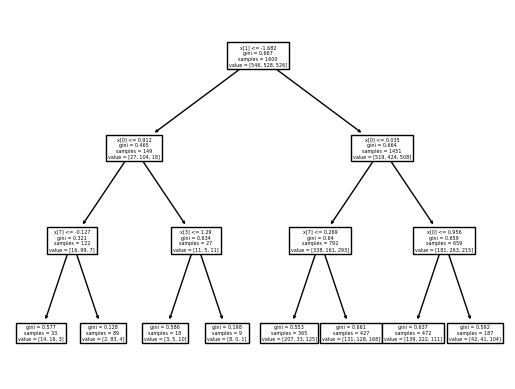

In [33]:
tree.plot_tree(clf)

### Decision Tree Regressor

In [34]:
dtr = DecisionTreeRegressor(max_depth=3,min_size=100)

In [35]:
train_dataR = np.concatenate((X_trainR,y_trainR[:,None]),axis=1).tolist()

In [36]:
dtr.fit(train_dataR, print_tree=True)

[X8 < -0.027]
 [X9 < -0.642]
  [X1 < -0.392]
   [-320.4783039817052]
   [-140.40920932728156]
  [X10 < -0.260]
   [-133.99578615020258]
   [15.775367350359154]
 [X9 < 0.256]
  [X10 < -0.590]
   [-77.8538509051007]
   [66.91881883926794]
  [X10 < 0.269]
   [107.67074843815826]
   [252.18305989408717]


In [37]:
scores = dtr.evaluate(n_folds=5)

In [38]:
print("Cross Validation scores (MSE):", scores)

Cross Validation scores (MSE): [20084.810147816523, 23622.599048110045, 22106.675095785646, 22971.972006630447, 22060.420060461394]


In [39]:
predictions = dtr.decision_tree(X_testR)

In [40]:
set(predictions)

{-320.4783039817052,
 -140.40920932728156,
 -133.99578615020258,
 -77.8538509051007,
 15.775367350359154,
 66.91881883926794,
 107.67074843815826,
 252.18305989408717}

In [41]:
print(f"DTR MSE: {dtr.accuracy_metric(y_testR, predictions)}")

DTR MSE: 21890.17287043655


In [42]:
from sklearn import tree

In [47]:
#Scikit learn implementation
reg = tree.DecisionTreeRegressor(max_depth=3)
reg = reg.fit(X_trainR, y_trainR)
preds = reg.predict(X_testR)

In [48]:
set(preds)

{-320.4783039817052,
 -140.4092093272815,
 -133.99578615020258,
 -77.8538509051007,
 15.775367350359144,
 66.91881883926793,
 107.67074843815826,
 252.18305989408728}

In [49]:
print(f'Scikit MSE: {sum((y_testR[i] - preds[i])**2 for i in range(len(preds)))/len(preds)}')

Scikit MSE: 21890.172870436545


[Text(0.5, 0.875, 'x[7] <= -0.027\nsquared_error = 40159.678\nsamples = 1600\nvalue = -0.349'),
 Text(0.25, 0.625, 'x[8] <= -0.643\nsquared_error = 35209.749\nsamples = 778\nvalue = -90.191'),
 Text(0.125, 0.375, 'x[0] <= -0.397\nsquared_error = 29066.062\nsamples = 207\nvalue = -211.741'),
 Text(0.0625, 0.125, 'squared_error = 23681.34\nsamples = 82\nvalue = -320.478'),
 Text(0.1875, 0.125, 'squared_error = 19753.801\nsamples = 125\nvalue = -140.409'),
 Text(0.375, 0.375, 'x[9] <= -0.26\nsquared_error = 30139.256\nsamples = 571\nvalue = -46.127'),
 Text(0.3125, 0.125, 'squared_error = 24151.063\nsamples = 236\nvalue = -133.996'),
 Text(0.4375, 0.125, 'squared_error = 25086.683\nsamples = 335\nvalue = 15.775'),
 Text(0.75, 0.625, 'x[8] <= 0.256\nsquared_error = 29974.637\nsamples = 822\nvalue = 84.683'),
 Text(0.625, 0.375, 'x[9] <= -0.59\nsquared_error = 26419.147\nsamples = 477\nvalue = 25.945'),
 Text(0.5625, 0.125, 'squared_error = 21427.038\nsamples = 135\nvalue = -77.854'),
 Text

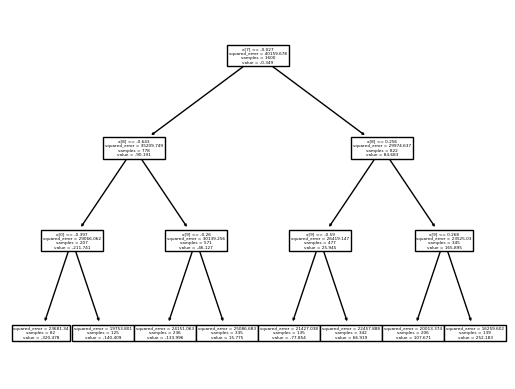

In [50]:
tree.plot_tree(reg)

## Support Vector Machine

In [14]:
from SVM import SVM

In [28]:
svm = SVM(kernel='rbf') # gamma is 10 by default

In [16]:
svm.fit(X_trainC,y_trainC,eval_train=True)

Finished training with accuracy 100.0 %


In [17]:
acc, preds = svm.evaluate(X_testC, y_testC)

In [18]:
preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
print(f'SVM Test Accuracy: {acc}%')

SVM Test Accuracy: 30.75%


In [20]:
# Test to change gamma
svm_test = SVM(kernel='rbf',gamma=4)

In [21]:
#Scikit Implementation
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [22]:
clf = OneVsRestClassifier(SVC(kernel='rbf', C=1, gamma=10)).fit(X_trainC,y_trainC)
preds = clf.predict(X_testC)

In [23]:
preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
print(f'Scikit OneVsRestClassifier Accuracy: {sum(preds[i] == y_testC[i] for i in range(len(preds)))/len(preds) *100}%')

Scikit OneVsRestClassifier Accuracy: 30.5%


In [26]:
# scikit SVC implementation
clf = SVC(gamma=10).fit(X_trainC,y_trainC)
preds = clf.predict(X_testC) 

In [27]:
print(f'Scikit SVC Accuracy: {sum(preds[i] == y_testC[i] for i in range(len(preds)))/len(preds) *100}%')

Scikit SVC Accuracy: 30.5%


## Convolutional Neural Network

### CNN Classifier

In [1]:
from CNN import CNNClassifier

In [2]:
from sklearn.datasets import make_classification

In [3]:
# Making a classification dataset
X_clf, y_clf = make_classification(n_samples=2000, n_features=529, n_redundant=0, n_informative=100, n_classes=4, random_state=42)

In [4]:
X_clf.shape

(2000, 529)

In [5]:
y_clf.shape

(2000,)

In [6]:
import matplotlib.pyplot as plt

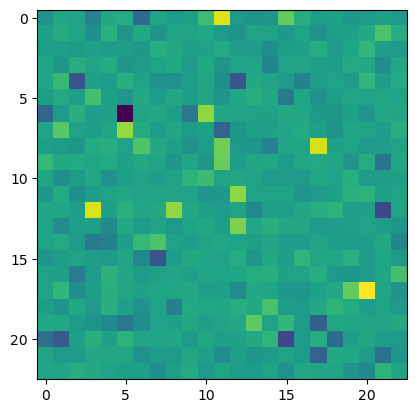

In [7]:
# Can reshape the data and make an image, can put this through to the cnn
single_image = X_clf[0].reshape(23,23)
plt.imshow(single_image)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
minmax_scaler = MinMaxScaler()
X_scaledtrain = minmax_scaler.fit_transform(X_clf)

In [10]:
X_scaledtrain.shape

(2000, 529)

In [11]:
X_scaledtrain = X_scaledtrain.reshape(2000,23,23)

In [12]:
X_scaledtrain.shape

(2000, 23, 23)

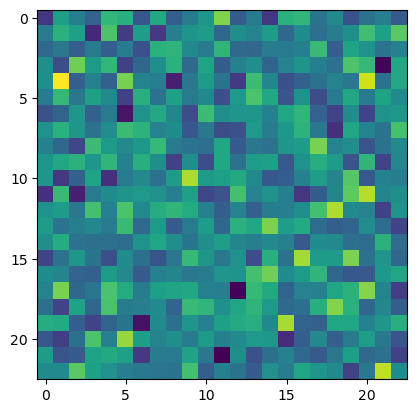

In [13]:
# Data after scaling with MinMaxScaler()
plt.imshow(X_scaledtrain[0])

In [14]:
cnn = CNNClassifier(n_classes=4) # There are four classes
cnn

CNNClassifier(
  (dropout): Dropout(p=0.25, inplace=False)
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (loss_func): CrossEntropyLoss()
  (fc1): Linear(in_features=800, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=4, bias=True)
)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaledtrain, y_clf, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(1600, 23, 23)

In [17]:
X_test.shape

(400, 23, 23)

In [18]:
y_test.shape

(400,)

In [19]:
y_train.shape

(1600,)

In [20]:
cnn.fit(X_train, y_train, X_test, y_test)

In [21]:
cnn.train(num_epochs=25,eval_train=True)

Epoch [1/25], Step [16/16], Loss: 1.3842
Training Accuracy: 25.125%
Test Accuracy 25.0%
------------------------------
Epoch [2/25], Step [16/16], Loss: 1.3851
Training Accuracy: 25.312501907348633%
Test Accuracy 24.25%
------------------------------
Epoch [3/25], Step [16/16], Loss: 1.3853
Training Accuracy: 24.75%
Test Accuracy 20.5%
------------------------------
Epoch [4/25], Step [16/16], Loss: 1.3877
Training Accuracy: 26.5625%
Test Accuracy 26.249998092651367%
------------------------------
Epoch [5/25], Step [16/16], Loss: 1.3863
Training Accuracy: 26.0%
Test Accuracy 23.75%
------------------------------
Epoch [6/25], Step [16/16], Loss: 1.3810
Training Accuracy: 25.5%
Test Accuracy 23.5%
------------------------------
Epoch [7/25], Step [16/16], Loss: 1.3815
Training Accuracy: 29.0%
Test Accuracy 23.25%
------------------------------
Epoch [8/25], Step [16/16], Loss: 1.3780
Training Accuracy: 26.625001907348633%
Test Accuracy 26.249998092651367%
------------------------------

In [22]:
cnn2 = CNNClassifier(n_classes=4)

In [23]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_clf.reshape(2000,23,23), y_clf, test_size=0.2, random_state=42)

In [24]:
cnn2.fit(X_train2, y_train2, X_test2, y_test2)

In [25]:
cnn2.train(num_epochs=25,eval_train=True)

Epoch [1/25], Step [16/16], Loss: 1.4031
Training Accuracy: 26.1875%
Test Accuracy 27.5%
------------------------------
Epoch [2/25], Step [16/16], Loss: 1.3745
Training Accuracy: 29.0625%
Test Accuracy 28.25%
------------------------------
Epoch [3/25], Step [16/16], Loss: 1.3775
Training Accuracy: 30.25%
Test Accuracy 26.0%
------------------------------
Epoch [4/25], Step [16/16], Loss: 1.3508
Training Accuracy: 33.0625%
Test Accuracy 29.0%
------------------------------
Epoch [5/25], Step [16/16], Loss: 1.3392
Training Accuracy: 36.6875%
Test Accuracy 32.25%
------------------------------
Epoch [6/25], Step [16/16], Loss: 1.2872
Training Accuracy: 39.0%
Test Accuracy 36.75%
------------------------------
Epoch [7/25], Step [16/16], Loss: 1.2567
Training Accuracy: 43.875%
Test Accuracy 34.5%
------------------------------
Epoch [8/25], Step [16/16], Loss: 1.2720
Training Accuracy: 46.8125%
Test Accuracy 40.0%
------------------------------
Epoch [9/25], Step [16/16], Loss: 1.2743
Tr

### CNN Regressor

In [1]:
from CNN import CNNRegressor

In [2]:
from sklearn.datasets import make_regression

In [3]:
X_reg, y_reg = make_regression(n_samples=2000, n_features=529, n_informative=200, n_targets=2, noise=1, random_state=42)

In [4]:
X_reg.shape

(2000, 529)

In [5]:
y_reg.shape

(2000, 2)

In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '[583.84479591 308.76155017]')

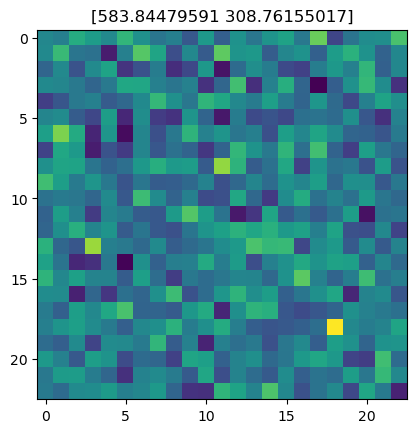

In [7]:
single_image = X_reg[0].reshape(23,23)
plt.imshow(single_image)
plt.title(str(y_reg[0]))

In [8]:
cnn_reg = CNNRegressor(n_targets=2) # There are two targets
cnn_reg

CNNRegressor(
  (dropout): Dropout(p=0.25, inplace=False)
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (loss_func): MSELoss()
  (fc1): Linear(in_features=800, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

In [9]:
from sklearn.model_selection import train_test_split
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_reg.reshape(2000,23,23), y_reg, test_size=0.2, random_state=42)

In [10]:
X_trainR.shape, X_testR.shape, y_trainR.shape, y_testR.shape

((1600, 23, 23), (400, 23, 23), (1600, 2), (400, 2))

In [11]:
cnn_reg.fit(X_trainR, y_trainR, X_testR, y_testR)

In [12]:
cnn_reg.train(num_epochs=25,eval_train=True)

Epoch [1/25], Step [16/16], Loss: 538054.3750
Training Accuracy: 659461.375
Test Accuracy 819202.5625
------------------------------
Epoch [2/25], Step [16/16], Loss: 537747.1875
Training Accuracy: 659322.6875
Test Accuracy 819328.9375
------------------------------
Epoch [3/25], Step [16/16], Loss: 536917.5000
Training Accuracy: 658995.0625
Test Accuracy 819664.9375
------------------------------
Epoch [4/25], Step [16/16], Loss: 534770.7500
Training Accuracy: 658065.5
Test Accuracy 819911.5
------------------------------
Epoch [5/25], Step [16/16], Loss: 532066.1875
Training Accuracy: 655277.5
Test Accuracy 817515.5
------------------------------
Epoch [6/25], Step [16/16], Loss: 524601.2500
Training Accuracy: 646983.25
Test Accuracy 807382.1875
------------------------------
Epoch [7/25], Step [16/16], Loss: 511505.1250
Training Accuracy: 626002.4375
Test Accuracy 782230.75
------------------------------
Epoch [8/25], Step [16/16], Loss: 486942.7500
Training Accuracy: 588289.9375
Te

In [3]:
X_reg2, y_reg2 = make_regression(n_samples=2000, n_features=529, n_informative=200, n_targets=1, noise=1, random_state=42)

In [4]:
X_reg2.shape

(2000, 529)

In [5]:
y_reg2.shape

(2000,)

In [6]:
import matplotlib.pyplot as plt

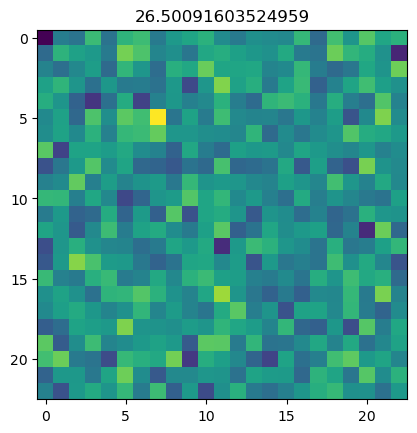

In [7]:
single_image = X_reg2[0].reshape(23,23)
plt.imshow(single_image)
plt.title(str(y_reg2[0]))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_trainR2, X_testR2, y_trainR2, y_testR2 = train_test_split(X_reg2.reshape(2000,23,23), y_reg2, test_size=0.2, random_state=42)

In [9]:
X_trainR2.shape, X_testR2.shape, y_trainR2.shape, y_testR2.shape

((1600, 23, 23), (400, 23, 23), (1600,), (400,))

In [10]:
cnn_reg2 = CNNRegressor(n_targets=1)
cnn_reg2

CNNRegressor(
  (dropout): Dropout(p=0.25, inplace=False)
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (loss_func): MSELoss()
  (fc1): Linear(in_features=800, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)

In [11]:
cnn_reg2.fit(X_trainR2, y_trainR2, X_testR2, y_testR2)

In [12]:
cnn_reg2.train(num_epochs=25,eval_train=True)

Epoch [1/25], Step [16/16], Loss: 916257.9375
Training Accuracy: tensor([734585.8125])
Test Accuracy tensor([662091.8750])
------------------------------
Epoch [2/25], Step [16/16], Loss: 914755.5000
Training Accuracy: tensor([733612.8750])
Test Accuracy tensor([663205.0625])
------------------------------
Epoch [3/25], Step [16/16], Loss: 912532.0000
Training Accuracy: tensor([732682.3750])
Test Accuracy tensor([664805.1250])
------------------------------
Epoch [4/25], Step [16/16], Loss: 910324.1875
Training Accuracy: tensor([730996.])
Test Accuracy tensor([664321.3750])
------------------------------
Epoch [5/25], Step [16/16], Loss: 906642.5000
Training Accuracy: tensor([728360.8750])
Test Accuracy tensor([663864.])
------------------------------
Epoch [6/25], Step [16/16], Loss: 897298.9375
Training Accuracy: tensor([722973.1250])
Test Accuracy tensor([659915.5000])
------------------------------
Epoch [7/25], Step [16/16], Loss: 881863.3750
Training Accuracy: tensor([712050.8125